In [22]:
import imblearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data = pd.read_csv("median_scaled.csv")

In [24]:
data.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr9,Attr10,Attr12,Attr13,...,Attr59,Attr61,Attr64,Attr65,Attr66,Attr67,Attr68,Attr69,Attr70,class
0,-0.305882,-0.567830,-0.191750,-0.118907,0.009449,-0.004600,-0.452027,0.328989,-0.022936,-0.015081,...,-0.018722,-0.708407,-1.073419,-0.125311,0.413225,-0.048981,0.005588,-0.294502,0,0
1,2.511211,-1.708722,1.979607,-0.257969,0.008522,-0.287835,-0.386111,0.799984,14.966639,0.046834,...,-0.047639,2.069378,-0.216780,-0.075797,0.209906,0.128412,-0.034505,-0.144385,1,0
2,-2.072361,-0.014605,0.015663,-0.327737,0.009483,0.002200,0.075177,0.104675,-0.025949,-0.040287,...,-0.035054,-1.069397,-0.247814,-0.368230,0.866998,-0.260872,-0.003748,-0.144385,0,0
3,0.305626,-1.001884,1.092889,0.904366,0.025844,0.066235,-0.376323,0.523407,-0.019647,-0.005064,...,-0.046023,0.444228,0.344121,0.093344,-1.281735,-0.000707,-0.031532,-0.229892,0,0
4,0.445815,-0.035583,-0.406950,-0.611737,-0.005197,0.002200,0.466185,0.115048,-0.021337,-0.008874,...,-0.046528,-0.078284,-0.271979,-0.008094,-0.374159,0.036156,0.422113,-0.146693,0,0


In [25]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

In [26]:
from sklearn.metrics import confusion_matrix
def plot_cm(classifier, predictions):
    cm = confusion_matrix(y_test, predictions)
    
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap='RdBu')
    classNames = ['Bankrupted','Not Bankrupted']
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), 
                     horizontalalignment='center', color='White')
    
    plt.show()
        
    tn, fp, fn, tp = cm.ravel()

    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    F1 = 2*recall*precision/(recall+precision)

    print('Recall={0:0.3f}'.format(recall),'\nPrecision={0:0.3f}'.format(precision))
    print('F1={0:0.3f}'.format(F1))

In [27]:
from sklearn.metrics import average_precision_score, precision_recall_curve
def plot_aucprc(classifier, scores):
    precision, recall, _ = precision_recall_curve(y_test, scores, pos_label=0)
    average_precision = average_precision_score(y_test, scores)

    print('Average precision-recall score: {0:0.3f}'.format(
          average_precision))

    plt.plot(recall, precision, label='area = %0.3f' % average_precision, color="green")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.legend(loc="best")
    plt.show()

# Classification
## Decision Tree

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [29]:
data_X = data.iloc[:, :-1]
data_y = data["class"]

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(data_X, 
                                                    data_y,
                                                   test_size = 0.3,
                                                   random_state = 24)

In [31]:
model = DecisionTreeClassifier()

In [32]:
re_stf = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
scores = cross_val_score(model, X_train, Y_train, scoring = "f1_micro", cv = re_stf)

In [33]:
print("Mean CV F1 : %.3f"% np.mean(scores))

Mean CV F1 : 0.936


In [34]:
scores = cross_val_score(model, X_train, Y_train, scoring = "roc_auc", cv = re_stf)

In [35]:
print("Mean CV ROC_AUC : %.3f"% np.mean(scores))

Mean CV ROC_AUC : 0.692


In [36]:
from sklearn.metrics import roc_auc_score

In [37]:
model.fit(X_train,Y_train)
pred_y = model.predict(X_test)

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [39]:
print("F1 : %.3f" % f1_score(Y_test, pred_y, average = 'micro'))
print("ROC AUC : %.3f" % roc_auc_score(Y_test, pred_y))

F1 : 0.934
ROC AUC : 0.710


## Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
forest = RandomForestClassifier(n_estimators=500, random_state=24)

In [42]:
scores = cross_val_score(forest, X_train, Y_train, scoring = "f1_micro", cv = re_stf)
print("Mean CV F1 : %.3f"% np.mean(scores))
scores = cross_val_score(forest, X_train, Y_train, scoring = "roc_auc", cv = re_stf)
print("Mean CV ROC_AUC : %.3f"% np.mean(scores))

Mean CV F1 : 0.956
Mean CV ROC_AUC : 0.882


In [43]:
forest.fit(X_train, Y_train)
pred_y = forest.predict(X_test)
print("F1 : %.3f" % f1_score(Y_test, pred_y, average = 'micro'))
print("ROC AUC : %.3f" % roc_auc_score(Y_test, pred_y))

F1 : 0.955
ROC AUC : 0.612


## XGBOOST

In [44]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [45]:
n_estimators = [200, 300, 400, 500, 600]
learning_rate = [0.01, 0.05, 0.1, 0.15, 0.2]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)

In [46]:
xgb_greedy_model = XGBClassifier()
grid_search = GridSearchCV(xgb_greedy_model, param_grid, scoring="roc_auc", cv=re_stf)
grid_result = grid_search.fit(X_train, Y_train)

Best: 0.914288 using {'learning_rate': 0.2, 'n_estimators': 300}
0.836783 (0.045509) with: {'learning_rate': 0.01, 'n_estimators': 200}
0.865733 (0.039090) with: {'learning_rate': 0.01, 'n_estimators': 300}
0.880966 (0.033196) with: {'learning_rate': 0.01, 'n_estimators': 400}
0.889485 (0.030789) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.894394 (0.030367) with: {'learning_rate': 0.01, 'n_estimators': 600}
0.903598 (0.029459) with: {'learning_rate': 0.05, 'n_estimators': 200}
0.908234 (0.030914) with: {'learning_rate': 0.05, 'n_estimators': 300}
0.909779 (0.030060) with: {'learning_rate': 0.05, 'n_estimators': 400}
0.911092 (0.029803) with: {'learning_rate': 0.05, 'n_estimators': 500}
0.912689 (0.030012) with: {'learning_rate': 0.05, 'n_estimators': 600}
0.912882 (0.029384) with: {'learning_rate': 0.1, 'n_estimators': 200}
0.912917 (0.029403) with: {'learning_rate': 0.1, 'n_estimators': 300}
0.913672 (0.030758) with: {'learning_rate': 0.1, 'n_estimators': 400}
0.913603 (0.031

Text(0, 0.5, 'ROC Score')

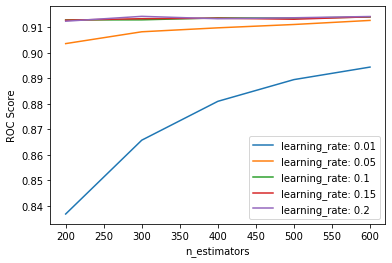

In [47]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = np.array(means).reshape(len(learning_rate), len(n_estimators))
for i, value in enumerate(learning_rate):
    plt.plot(n_estimators, scores[i], label='learning_rate: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('ROC Score')

## SMOTE

## Decision Tree

In [48]:
steps = [("over", SMOTE()), ("model", DecisionTreeClassifier())]
pipeline = Pipeline(steps = steps)

In [49]:
scores2 = cross_val_score(pipeline, X_train, Y_train, scoring = "f1_micro", cv = re_stf)

In [50]:
print("Mean CV F1 : %.3f"% np.mean(scores2))

Mean CV F1 : 0.877


In [51]:
scores2 = cross_val_score(pipeline, X_train, Y_train, scoring = "roc_auc", cv = re_stf)

In [52]:
print("Mean CV ROC_AUC : %.3f"% np.mean(scores2))

Mean CV ROC_AUC : 0.673


In [53]:
pipeline.fit(X_train, Y_train)
pred_y2 = pipeline.predict(X_test)

In [54]:
print("F1 : %.3f" % f1_score(Y_test, pred_y2, average = 'micro'))
print("ROC AUC : %.3f" % roc_auc_score(Y_test, pred_y2))

F1 : 0.862
ROC AUC : 0.664


## Random Forest

In [55]:
steps = [("over", SMOTE()), ("model", RandomForestClassifier(n_estimators=500, random_state=24))]
pipeline2 = Pipeline(steps = steps)

In [56]:
scores2 = cross_val_score(pipeline2, X_train, Y_train, scoring = "f1_micro", cv = re_stf)
print("Mean CV F1 : %.3f"% np.mean(scores2))

Mean CV F1 : 0.938


In [57]:
scores2 = cross_val_score(pipeline2, X_train, Y_train, scoring = "roc_auc", cv = re_stf)
print("Mean CV ROC_AUC : %.3f"% np.mean(scores2))

Mean CV ROC_AUC : 0.870


In [58]:
pipeline2.fit(X_train, Y_train)
pred_y2 = pipeline2.predict(X_test)

In [59]:
print("F1 : %.3f" % f1_score(Y_test, pred_y2, average = 'micro'))
print("ROC AUC : %.3f" % roc_auc_score(Y_test, pred_y2))

F1 : 0.940
ROC AUC : 0.660


## XGBOOST

In [60]:
def grid_smote_only_search(model) :
    
    steps = [("over", SMOTE()), ("model", model)]
    pipeline = Pipeline(steps = steps)

    f1_scores = cross_val_score(pipeline, X_train, Y_train, scoring = "f1_micro", cv = re_stf)
    print("Mean F1 : %.3f" % (np.mean(f1_scores)))
    roc_scores = cross_val_score(pipeline, X_train, Y_train, scoring = "roc_auc", cv = re_stf)
    print("Mean ROC AUC : %.3f" % (np.mean(roc_scores)))

    pipeline.fit(X_train, Y_train)
    pred_y = pipeline.predict(X_test)
    print("\nF1 : %.3f" % f1_score(Y_test, pred_y, average = 'micro'))
    print("ROC AUC : %.3f" % roc_auc_score(Y_test, pred_y))

In [62]:
'''
for n in n_estimators:
    for rate in learning_rate:
        print("\n N_estimators : ", n, " & Learning_rate : ", rate)
        grid_smote_only_search(XGBClassifier(n_estimators = n, learning_rate = rate))
        '''

'\nfor n in n_estimators:\n    for rate in learning_rate:\n        print("\n N_estimators : ", n, " & Learning_rate : ", rate)\n        grid_smote_only_search(XGBClassifier(n_estimators = n, learning_rate = rate))\n        '

In [63]:
#얘들은 나중에 돌려보기
#pred_y = xgb_model.predict(X_test)
#scores = xgb_model.predict_proba(X_test)[:,1]

#plot_cm(xgb_model, pred_y)
#plot_aucprc(xgb_model, scores)

# SMOTE combined with Undersampling
## Decision Tree

In [64]:
over2 = SMOTE(sampling_strategy = 0.1)
under2 = RandomUnderSampler(sampling_strategy = 0.5)
steps2 = [('over', over2), ('under', under2), ('model', DecisionTreeClassifier())]
pipeline2 = Pipeline(steps = steps2)

In [65]:
f1_scores2 = cross_val_score(pipeline2, X_train, Y_train, scoring = "f1_micro", cv = re_stf)
print("Mean CV F1 : %.3f"% np.mean(f1_scores2))

Mean CV F1 : 0.819


In [66]:
roc_scores2 = cross_val_score(pipeline2, X_train, Y_train, scoring = "roc_auc", cv = re_stf)
print("Mean CV ROC_AUC : %.3f"% np.mean(roc_scores2))

Mean CV ROC_AUC : 0.702


In [67]:
pipeline2.fit(X_train, Y_train)
pred_y2 = pipeline2.predict(X_test)

In [68]:
print("F1 : %.3f" % f1_score(Y_test, pred_y2, average = 'micro'))
print("ROC AUC : %.3f" % roc_auc_score(Y_test, pred_y2))

F1 : 0.844
ROC AUC : 0.755


## Random Forest

In [69]:
steps3 = [('over', over2), ('under', under2), ('model', RandomForestClassifier(n_estimators=500, random_state=24))]
pipeline3 = Pipeline(steps = steps3)

In [70]:
f1_scores3 = cross_val_score(pipeline3, X_train, Y_train, scoring = "f1_micro", cv = re_stf)
print("Mean CV F1 : %.3f"% np.mean(f1_scores3))

Mean CV F1 : 0.909


In [71]:
roc_scores3 = cross_val_score(pipeline3, X_train, Y_train, scoring = "roc_auc", cv = re_stf)
print("Mean CV ROC_AUC : %.3f"% np.mean(roc_scores3))

Mean CV ROC_AUC : 0.862


In [72]:
pipeline3.fit(X_train, Y_train)
pred_y3 = pipeline3.predict(X_test)

In [73]:
print("F1 : %.3f" % f1_score(Y_test, pred_y3, average = 'micro'))
print("ROC AUC : %.3f" % roc_auc_score(Y_test, pred_y3))

F1 : 0.920
ROC AUC : 0.755


## GRID SEARCH
## Decision Tree

In [74]:
def grid_smote_search(lst, model) :
    
    for k in lst:
        over4 = SMOTE(sampling_strategy = 0.1, k_neighbors = k)
        under4 = RandomUnderSampler(sampling_strategy = 0.5)
        steps4 = [("over", over4), ("under", under4), ("model", model)]
        pipeline4 = Pipeline(steps = steps4)

        print("\n------- k = ", k,"-------")
        f1_scores4 = cross_val_score(pipeline4, X_train, Y_train, scoring = "f1_micro", cv = re_stf)
        print("Mean F1 : %.3f" % (np.mean(f1_scores4)))
        roc_scores4 = cross_val_score(pipeline4, X_train, Y_train, scoring = "roc_auc", cv = re_stf)
        print("Mean ROC AUC : %.3f" % (np.mean(roc_scores4)))

        pipeline4.fit(X_train, Y_train)
        pred_y4 = pipeline4.predict(X_test)
        print("\nF1 : %.3f" % f1_score(Y_test, pred_y4, average = 'micro'))
        print("ROC AUC : %.3f" % roc_auc_score(Y_test, pred_y4))

In [75]:
k_values = [1,2,3,4,5,6,7]

In [76]:
grid_smote_search(k_values, DecisionTreeClassifier())


------- k =  1 -------
Mean F1 : 0.822
Mean ROC AUC : 0.681

F1 : 0.864
ROC AUC : 0.806

------- k =  2 -------
Mean F1 : 0.826
Mean ROC AUC : 0.680

F1 : 0.820
ROC AUC : 0.686

------- k =  3 -------
Mean F1 : 0.824
Mean ROC AUC : 0.710

F1 : 0.818
ROC AUC : 0.741

------- k =  4 -------
Mean F1 : 0.821
Mean ROC AUC : 0.699

F1 : 0.825
ROC AUC : 0.700

------- k =  5 -------
Mean F1 : 0.825
Mean ROC AUC : 0.682

F1 : 0.825
ROC AUC : 0.693

------- k =  6 -------
Mean F1 : 0.822
Mean ROC AUC : 0.703

F1 : 0.821
ROC AUC : 0.706

------- k =  7 -------
Mean F1 : 0.821
Mean ROC AUC : 0.692

F1 : 0.834
ROC AUC : 0.677


## Random Forest

In [77]:
grid_smote_search(k_values, RandomForestClassifier(n_estimators=400))


------- k =  1 -------
Mean F1 : 0.913
Mean ROC AUC : 0.862

F1 : 0.921
ROC AUC : 0.715

------- k =  2 -------
Mean F1 : 0.911
Mean ROC AUC : 0.862

F1 : 0.902
ROC AUC : 0.693

------- k =  3 -------
Mean F1 : 0.912
Mean ROC AUC : 0.861

F1 : 0.917
ROC AUC : 0.737

------- k =  4 -------
Mean F1 : 0.909
Mean ROC AUC : 0.861

F1 : 0.919
ROC AUC : 0.730

------- k =  5 -------
Mean F1 : 0.909
Mean ROC AUC : 0.861

F1 : 0.919
ROC AUC : 0.714

------- k =  6 -------
Mean F1 : 0.907
Mean ROC AUC : 0.859

F1 : 0.914
ROC AUC : 0.703

------- k =  7 -------
Mean F1 : 0.908
Mean ROC AUC : 0.858

F1 : 0.916
ROC AUC : 0.716


In [78]:
grid_smote_search(k_values, RandomForestClassifier(n_estimators=500))


------- k =  1 -------
Mean F1 : 0.912
Mean ROC AUC : 0.864

F1 : 0.913
ROC AUC : 0.739

------- k =  2 -------
Mean F1 : 0.911
Mean ROC AUC : 0.863

F1 : 0.913
ROC AUC : 0.735

------- k =  3 -------
Mean F1 : 0.908
Mean ROC AUC : 0.865

F1 : 0.918
ROC AUC : 0.722

------- k =  4 -------
Mean F1 : 0.909
Mean ROC AUC : 0.858

F1 : 0.918
ROC AUC : 0.710

------- k =  5 -------
Mean F1 : 0.910
Mean ROC AUC : 0.863

F1 : 0.913
ROC AUC : 0.723

------- k =  6 -------
Mean F1 : 0.909
Mean ROC AUC : 0.863

F1 : 0.907
ROC AUC : 0.724

------- k =  7 -------
Mean F1 : 0.909
Mean ROC AUC : 0.862

F1 : 0.914
ROC AUC : 0.708


## XGBOOST

## 1) SMOTE만

In [87]:
n_estimators = [200, 300, 400, 500, 600]
learning_rate = [0.01, 0.05, 0.1, 0.15, 0.2]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)

In [88]:
X_resampled, y_resampled = SMOTE().fit_sample(X_train,list(Y_train))

In [89]:
xgb_model = XGBClassifier()

In [90]:
grid_search2 = GridSearchCV(xgb_model, param_grid, scoring="roc_auc", cv=re_stf)
grid_result2 = grid_search2.fit(X_resampled, y_resampled)

Best: 0.998097 using {'learning_rate': 0.2, 'n_estimators': 600}
0.900608 (0.008960) with: {'learning_rate': 0.01, 'n_estimators': 200}
0.920009 (0.007901) with: {'learning_rate': 0.01, 'n_estimators': 300}
0.931636 (0.007048) with: {'learning_rate': 0.01, 'n_estimators': 400}
0.940535 (0.006306) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.947994 (0.005671) with: {'learning_rate': 0.01, 'n_estimators': 600}
0.967144 (0.004512) with: {'learning_rate': 0.05, 'n_estimators': 200}
0.979558 (0.003261) with: {'learning_rate': 0.05, 'n_estimators': 300}
0.985470 (0.002701) with: {'learning_rate': 0.05, 'n_estimators': 400}
0.989071 (0.002105) with: {'learning_rate': 0.05, 'n_estimators': 500}
0.991304 (0.001843) with: {'learning_rate': 0.05, 'n_estimators': 600}
0.985619 (0.002461) with: {'learning_rate': 0.1, 'n_estimators': 200}
0.991493 (0.001867) with: {'learning_rate': 0.1, 'n_estimators': 300}
0.994241 (0.001388) with: {'learning_rate': 0.1, 'n_estimators': 400}
0.995588 (0.001

Text(0, 0.5, 'ROC Score')

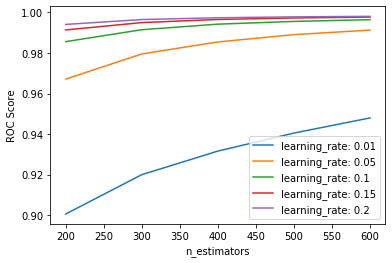

In [91]:
print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = np.array(means).reshape(len(learning_rate), len(n_estimators))
for i, value in enumerate(learning_rate):
    plt.plot(n_estimators, scores[i], label='learning_rate: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('ROC Score')

In [103]:
best_xgb_model = XGBClassifier(n_estimators = 600, learning_rate = 0.3)

In [104]:
best_xgb_model.fit(X_resampled, y_resampled)
pred_y3 = best_xgb_model.predict(X_test)

In [105]:
print("F1 : %.3f" % f1_score(Y_test, pred_y3, average = 'micro'))
print("ROC AUC : %.3f" % roc_auc_score(Y_test, pred_y3, average = 'macro'))

F1 : 0.957
ROC AUC : 0.766


In [106]:
best_xgb_model.feature_importances_

array([0.01476122, 0.03325919, 0.01574022, 0.01536559, 0.02458439,
       0.05772429, 0.01445045, 0.01115255, 0.00852915, 0.0690656 ,
       0.01325373, 0.0226093 , 0.01691128, 0.0226993 , 0.01887122,
       0.0472465 , 0.02386915, 0.01051076, 0.01823594, 0.01373924,
       0.02727188, 0.03396433, 0.01467973, 0.0162883 , 0.01133124,
       0.07804979, 0.01043436, 0.01343349, 0.01203869, 0.01627873,
       0.02096221, 0.02981041, 0.02043391, 0.0227726 , 0.02451443,
       0.01028873, 0.00931485, 0.01146679, 0.04345851, 0.10062796],
      dtype=float32)

## SMOTE + Under

In [107]:
for n in n_estimators:
    for rate in learning_rate:
        print("\n N_estimators : ", n, " & Learning_rate : ", rate)
        grid_smote_search(k_values, XGBClassifier(n_estimators = n, learning_rate = rate))


 N_estimators :  200  & Learning_rate :  0.01

------- k =  1 -------
Mean F1 : 0.904
Mean ROC AUC : 0.862

F1 : 0.911
ROC AUC : 0.774

------- k =  2 -------
Mean F1 : 0.901
Mean ROC AUC : 0.859

F1 : 0.924
ROC AUC : 0.761

------- k =  3 -------
Mean F1 : 0.900
Mean ROC AUC : 0.859

F1 : 0.917
ROC AUC : 0.774

------- k =  4 -------
Mean F1 : 0.903
Mean ROC AUC : 0.851

F1 : 0.917
ROC AUC : 0.770

------- k =  5 -------
Mean F1 : 0.904
Mean ROC AUC : 0.851

F1 : 0.919
ROC AUC : 0.742

------- k =  6 -------
Mean F1 : 0.903
Mean ROC AUC : 0.858

F1 : 0.911
ROC AUC : 0.758

------- k =  7 -------
Mean F1 : 0.899
Mean ROC AUC : 0.855

F1 : 0.897
ROC AUC : 0.715

 N_estimators :  200  & Learning_rate :  0.05

------- k =  1 -------
Mean F1 : 0.918
Mean ROC AUC : 0.894

F1 : 0.927
ROC AUC : 0.803

------- k =  2 -------
Mean F1 : 0.916
Mean ROC AUC : 0.897

F1 : 0.923
ROC AUC : 0.809

------- k =  3 -------
Mean F1 : 0.913
Mean ROC AUC : 0.891

F1 : 0.931
ROC AUC : 0.781

------- k =  4 

Mean F1 : 0.922
Mean ROC AUC : 0.901

F1 : 0.934
ROC AUC : 0.799

------- k =  3 -------
Mean F1 : 0.922
Mean ROC AUC : 0.905

F1 : 0.934
ROC AUC : 0.815

------- k =  4 -------
Mean F1 : 0.922
Mean ROC AUC : 0.905

F1 : 0.939
ROC AUC : 0.810

------- k =  5 -------
Mean F1 : 0.921
Mean ROC AUC : 0.904

F1 : 0.932
ROC AUC : 0.794

------- k =  6 -------
Mean F1 : 0.923
Mean ROC AUC : 0.903

F1 : 0.938
ROC AUC : 0.825

------- k =  7 -------
Mean F1 : 0.925
Mean ROC AUC : 0.900

F1 : 0.924
ROC AUC : 0.793

 N_estimators :  400  & Learning_rate :  0.15

------- k =  1 -------
Mean F1 : 0.929
Mean ROC AUC : 0.899

F1 : 0.935
ROC AUC : 0.791

------- k =  2 -------
Mean F1 : 0.923
Mean ROC AUC : 0.903

F1 : 0.930
ROC AUC : 0.805

------- k =  3 -------
Mean F1 : 0.926
Mean ROC AUC : 0.904

F1 : 0.924
ROC AUC : 0.786

------- k =  4 -------
Mean F1 : 0.924
Mean ROC AUC : 0.898

F1 : 0.939
ROC AUC : 0.790

------- k =  5 -------
Mean F1 : 0.922
Mean ROC AUC : 0.905

F1 : 0.941
ROC AUC : 0.80

Mean F1 : 0.921
Mean ROC AUC : 0.907

F1 : 0.925
ROC AUC : 0.798

------- k =  5 -------
Mean F1 : 0.922
Mean ROC AUC : 0.907

F1 : 0.929
ROC AUC : 0.784

------- k =  6 -------
Mean F1 : 0.921
Mean ROC AUC : 0.906

F1 : 0.935
ROC AUC : 0.795

------- k =  7 -------
Mean F1 : 0.922
Mean ROC AUC : 0.903

F1 : 0.928
ROC AUC : 0.783
